In [4]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymc as pm
import scipy.stats as stats

%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

##### 1. Supposed the globe tossing data had turned out to be 3 water and 11 land. Construct the posterior distribution.

In [7]:
def compute_posterior(W, L, poss=np.linspace(0, 1, 11)): # 11 equally spaced values between 0 and 1 for the possible probabilities of landing on land
    # Compute likelihood for each value of q in poss
    likelihoods = np.array([q**W * (1-q)**L for q in poss]) # Value: q, Water tosses: w, Land tosses: l
    
    # Normalize the likelihoods to get posterior
    posterior = likelihoods / likelihoods.sum()
    
    # Create a DataFrame similar to the R function output
    result = pd.DataFrame({
        'poss': poss,
        'likelihood': likelihoods,
        'posterior': np.round(posterior, 3)
    })
    
    return result

In [8]:
W = 3  # number of water tosses
L = 11 # number of land tosses
posterior_df = compute_posterior(W, L, poss=np.linspace(0, 1, 11))
print(posterior_df)

    poss    likelihood  posterior
0    0.0  0.000000e+00      0.000
1    0.1  3.138106e-04      0.171
2    0.2  6.871948e-04      0.374
3    0.3  5.338782e-04      0.291
4    0.4  2.321901e-04      0.126
5    0.5  6.103516e-05      0.033
6    0.6  9.059697e-06      0.005
7    0.7  6.076142e-07      0.000
8    0.8  1.048576e-08      0.000
9    0.9  7.290000e-12      0.000
10   1.0  0.000000e+00      0.000


##### 2. Using the posterior distribution from 1, compute the posterior predictive distribution for the next 5 tosses of the same globe. Use the sampling method.

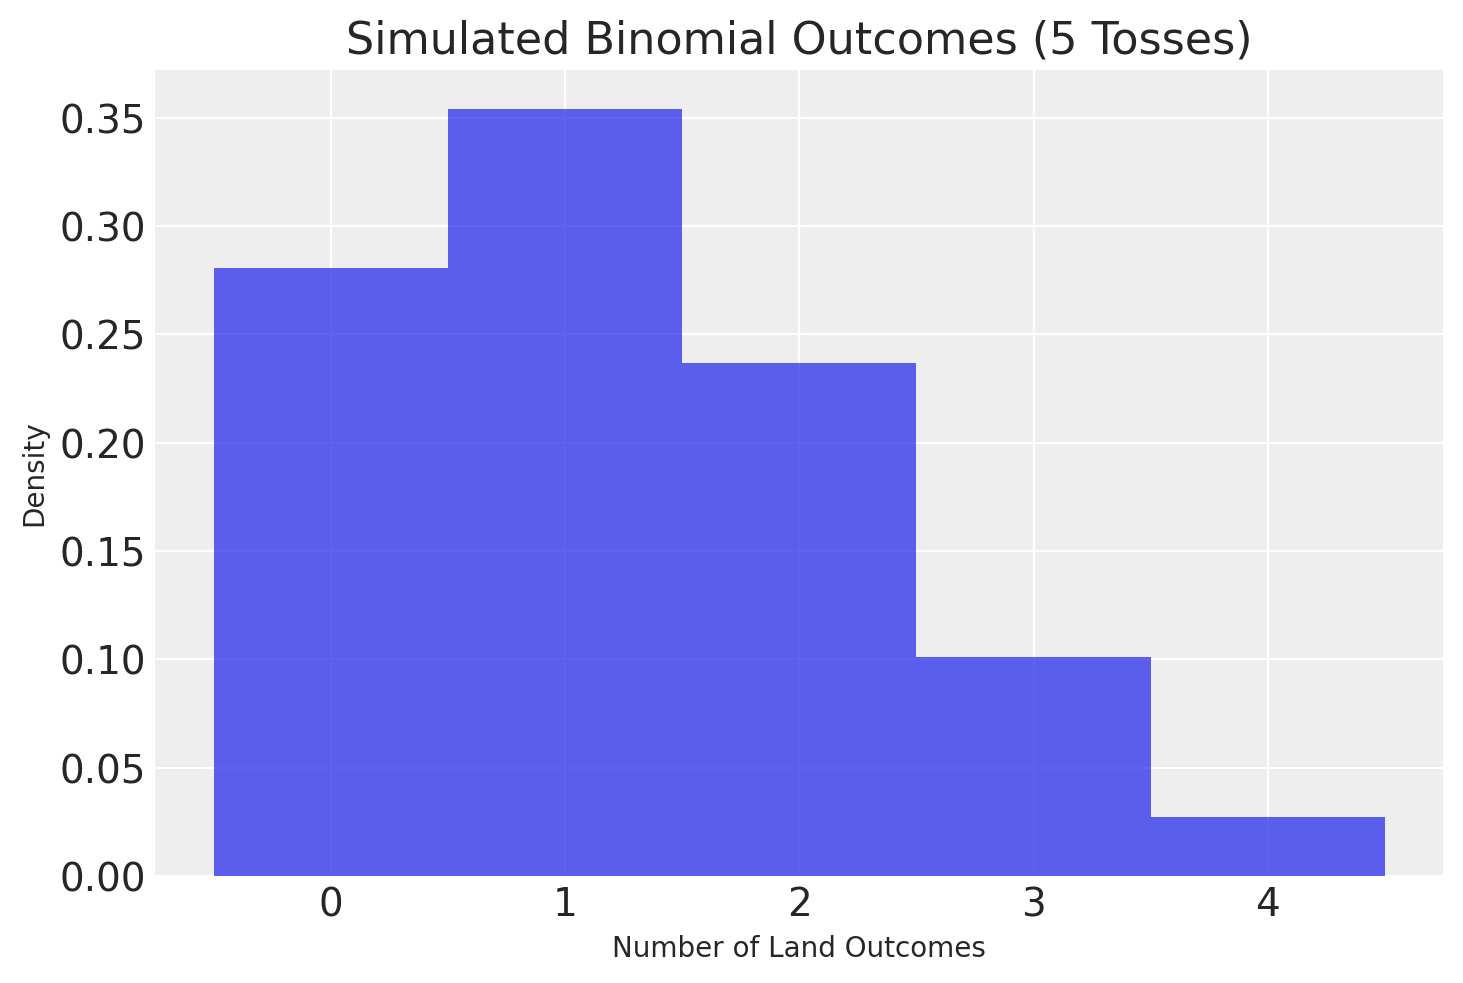

In [9]:
# Step 1: Draw 10,000 samples from a Beta(4, 12) distribution
p_samples = np.random.beta(3 + 1, 11 + 1, size=int(1e4))  # Beta(4, 12) distribution

# Step 2: Simulate 10,000 binomial samples, each with 5 trials and probability p from p_samples
W_sim = np.random.binomial(n=5, p=p_samples, size=int(1e4))  # Binomial(5, p)

# Step 3: Plot a histogram of W_sim
plt.hist(W_sim, bins=np.arange(0, 6) - 0.5, density=True, alpha=0.75)
plt.title("Simulated Binomial Outcomes (5 Tosses)")
plt.xlabel("Number of Land Outcomes")
plt.ylabel("Density")
plt.show()

In [10]:
W_sim

array([3, 1, 1, ..., 2, 3, 1])

##### 3. Suppose you observe W=7 water points but you forget to write down how many times the globe was tossed, so you don't know the number of land points L.  Assume that p=0.7 and compute the posterior distribution of the number of tosses N. Use the binomial distribution.

In [13]:
from scipy.special import comb 

In [16]:
def compute_posterior_N(W, p, N_max):
    # Compute the likelihood for each N from W to N_max
    likelihoods = np.array([comb(n, W) * p**W * (1 - p)**(n - W) for n in range(W, N_max + 1)])
    
    # Normalize the likelihoods to get posterior
    posterior = likelihoods / likelihoods.sum()
    
    # Create a DataFrame similar to the R function output
    result = pd.DataFrame({
        'N': np.arange(W, N_max + 1),
        'likelihood': likelihoods,
        'posterior': np.round(posterior, 3)
    })
    
    return result

In [17]:
W = 7
p = 0.7
N_max = 20

posterior_df = compute_posterior_N(W, p, N_max)
print(posterior_df)

     N  likelihood  posterior
0    7    0.082354      0.058
1    8    0.197650      0.138
2    9    0.266828      0.187
3   10    0.266828      0.187
4   11    0.220133      0.154
5   12    0.158496      0.111
6   13    0.103022      0.072
7   14    0.061813      0.043
8   15    0.034770      0.024
9   16    0.018544      0.013
10  17    0.009457      0.007
11  18    0.004643      0.003
12  19    0.002205      0.002
13  20    0.001018      0.001
